In [17]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

</br>
Here I am planning to perform all the below **tasks:**

+ Choose the **sample data which is 20% data**

+ Divide the sample data to **train and test** data

+ Create models with default values

+ Train the model

+ Validate and test the model

+ Plot **recall-precision curv**e for all the trained models to compare

</br>

In [18]:
#Read and validate the previously cleaned file
df = pd.read_csv('../Backorder_clean_withTransitOutlier.csv')
df.head()


,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommended_stock,source_performance_6_months,source_performance_12_months,deck_risk,ppap_risk,stop_auto_buy,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.84,0.83,No,No,Yes,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,No,No,Yes,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.84,0.83,Yes,No,Yes,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,1.0,0.10,0.13,No,No,Yes,No
4,1044048,8.0,8.0,0.0,0.0,0.0,4.0,2.0,0.84,0.83,Yes,No,Yes,No


In [20]:
# Prepare the data for modelling
X = pd.DataFrame(df.columns)
X = df[df.columns]
y =df['went_on_backorder']
X.shape , y.shape

((1687832, 14), (1687832,))

In [21]:
# Convert categorical data to numerical
y = y.replace('Yes', 1)
y= y.replace('No', 0)
X['deck_risk_n']= df.deck_risk.map({'Yes':1,'No':0})
X['ppap_risk_n']= df.ppap_risk.map({'Yes':1,'No':0})
X['stop_auto_buy_n']= df.stop_auto_buy.map({'Yes':1,'No':0})
X = X.drop(['went_on_backorder','deck_risk', 'ppap_risk', 'stop_auto_buy','product_id'], axis=1, errors='ignore')
X.shape, y.shape

((1687832, 12), (1687832,))

In [22]:
#get 20% sample data 
X_sample, X_data,  y_sample, y_data = train_test_split(X, y, test_size=.80, random_state=42) 
X_sample.shape , y_sample.shape, X_data.shape, y_data.shape

((337566, 12), (337566,), (1350266, 12), (1350266,))

In [23]:
          
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.30, random_state=42)
X_train.shape, X_test.shape

((236296, 12), (101270, 12))

# Train KNN model with default parameters on 20% sample data

In [24]:
# KNN Classifier
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_jobs=-1))]
#Create the pipeline: pipeline 
pipeline_knn = Pipeline(steps)

# Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict( X_test )
# get the classification report
knn_report = classification_report( y_test, knn_prediction )
#print the report
print(knn_report)
   

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    100645
          1       0.15      0.01      0.01       625

avg / total       0.99      0.99      0.99    101270



# Train LinearSvc model with default parameters on 20% sample data

In [27]:
# Train default LinearSV on 20% of the data
steps = [('scaler', StandardScaler()),
         ('svclinear', svm.LinearSVC(class_weight='balanced'))]
#Create the pipeline: pipeline 
pipeline_svclinear = Pipeline(steps)

# Fit to the training set
pipeline_svclinear.fit(X_train, y_train)
svclinear_prediction = pipeline_svclinear.predict( X_test )
# get the classification report
svclinear_report = classification_report( y_test, svclinear_prediction )
#print the report
print(svclinear_report)

             precision    recall  f1-score   support

          0       1.00      0.74      0.85    100645
          1       0.01      0.58      0.03       625

avg / total       0.99      0.73      0.84    101270



# Train SVC model with default parameters on 20% sample data

In [28]:
# Train default SVC on 10% of the date and get basic rsult
steps = [('scaler', StandardScaler()),
         ('svc', svm.SVC(class_weight='balanced'))]
#Create the pipeline: pipeline 
pipeline_svc = Pipeline(steps)

# Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict( X_test )
# get the classification report
svc_report = classification_report( y_test, svc_prediction )
#print the report
print(svc_report)

             precision    recall  f1-score   support

          0       1.00      0.68      0.81    100645
          1       0.01      0.58      0.02       625

avg / total       0.99      0.68      0.80    101270



# Train LogisticRegression model with default parameters on 20% sample data

In [29]:
# Train default LogisticRegression on 20% of the data
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression(class_weight='balanced'))]
#Create the pipeline: pipeline 
pipeline_logreg = Pipeline(steps)

# Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict( X_test )
# get the classification report
logreg_report = classification_report(y_test, logreg_prediction )
#print the report
print(logreg_report)

             precision    recall  f1-score   support

          0       1.00      0.63      0.77    100645
          1       0.01      0.77      0.03       625

avg / total       0.99      0.63      0.77    101270



# Train RandomForestClassifier model with default parameters on 20% sample data

In [30]:
# Train default RandomForest on 20% of the data
rfmodel= RandomForestClassifier(random_state = 32)
# Fit to the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict( X_test )
# get the classification report
rfmodel_report = classification_report(y_test, rfmodel_prediction )
#print the report
print(rfmodel_report)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    100645
          1       0.47      0.06      0.10       625

avg / total       0.99      0.99      0.99    101270



# Train GradientBoostingClassifier model with default parameters on 20% sample data

In [31]:
# Train default Ra on 20% of the data
gbmodel= GradientBoostingClassifier(random_state = 32)
# Fit to the training set
gbmodel.fit(X_train, y_train)
gbmodel_prediction = gbmodel.predict( X_test )
# get the classification report
gbmodel_report = classification_report(y_test, gbmodel_prediction )
#print the report
print(gbmodel_report)


             precision    recall  f1-score   support

          0       0.99      1.00      1.00    100645
          1       0.26      0.02      0.03       625

avg / total       0.99      0.99      0.99    101270



# Train AdaBoostClassifier model with default parameters on 20% sample data

In [32]:
# Train default Ra on 20% of the data
abmodel= AdaBoostClassifier(random_state = 32)
# Fit to the training set
abmodel.fit(X_train, y_train)
abmodel_prediction = abmodel.predict( X_test )
# get the classification report
abmodel_report = classification_report(y_test, abmodel_prediction )
#print the report
print(abmodel_report)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    100645
          1       0.21      0.03      0.06       625

avg / total       0.99      0.99      0.99    101270



In [15]:
# AdaBoostClassifie with randomforest estimator
abmodel_rf= AdaBoostClassifier(base_estimator=rfmodel,random_state = 32)
# Fit to the training set
abmodel_rf.fit(X_train, y_train)
abmodel_prediction_rf = abmodel_rf.predict( X_test )
# get the classification report
abmodel_report_rf = classification_report(y_test, abmodel_prediction_rf )
#print the report
print(abmodel_report_rf)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    100645
          1       0.55      0.09      0.16       625

avg / total       0.99      0.99      0.99    101270



In [45]:
feature_import_rf = pd.Series(rfmodel.feature_importances_, index=X_test.columns)
feature_import_rf.sort_values(ascending=False)

current_inventory               0.149979
source_performance_12_months    0.141107
source_performance_6_months     0.138525
prior_sales_9_month             0.126859
prior_sales_6_month             0.109189
prior_sales_3_month             0.093952
minimum_recommended_stock       0.075333
prior_sales_1_month             0.072217
transit_duration                0.050091
ppap_risk_n                     0.020528
deck_risk_n                     0.016695
stop_auto_buy_n                 0.005526
dtype: float64

In [46]:
feature_import_gb = pd.Series(gbmodel.feature_importances_, index=X_test.columns)
feature_import_gb.sort_values(ascending=False)

current_inventory               0.359186
prior_sales_1_month             0.138473
minimum_recommended_stock       0.099470
prior_sales_9_month             0.095126
prior_sales_3_month             0.090347
source_performance_12_months    0.063806
source_performance_6_months     0.063612
prior_sales_6_month             0.039278
transit_duration                0.038963
deck_risk_n                     0.008435
stop_auto_buy_n                 0.003280
ppap_risk_n                     0.000023
dtype: float64

In [16]:
# Train default Ra on 20% of the data

abmodel_gb= AdaBoostClassifier(base_estimator=gbmodel,random_state = 32)
# Fit to the training set
abmodel_gb.fit(X_train, y_train)
abmodel_prediction_gb = abmodel_gb.predict( X_test )
# get the classification report
abmodel_report_gb = classification_report(y_test, abmodel_prediction_gb )
#print the report
print(abmodel_report_gb)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    100645
          1       0.31      0.07      0.11       625

avg / total       0.99      0.99      0.99    101270



C:\Users\mehrade\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


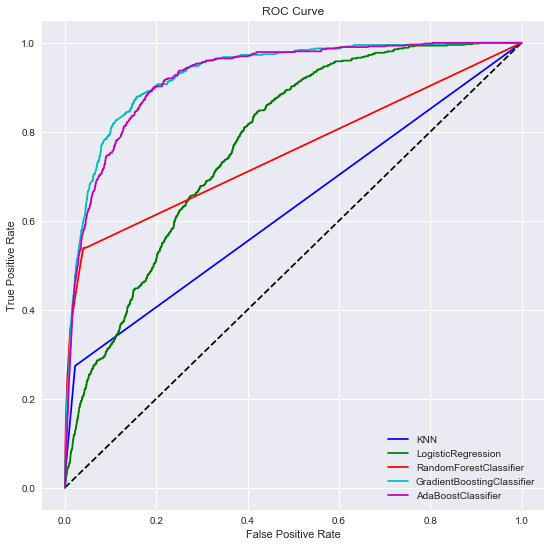

In [38]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plt.plot([0, 1], [0, 1], 'k--')
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

C:\Users\mehrade\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


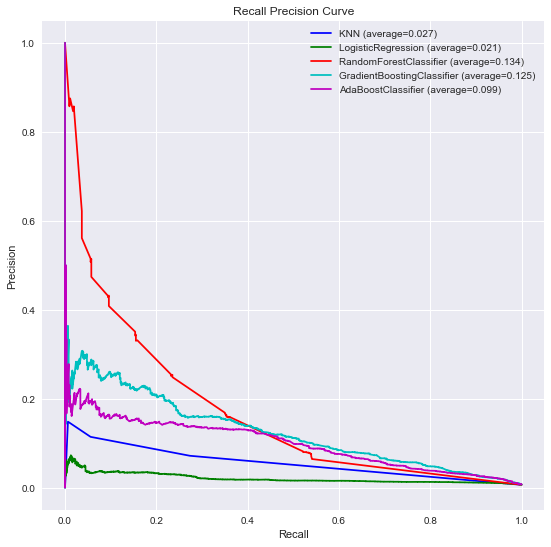

In [43]:
#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_pred_prob)
    average_precision= average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')




# Conclusion
As we can see here, **RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier** has better precision value. I decided to tune and validate these models. 

Please checkout **'BackOrderPredictionModel'** jyputer nootbook.
